# Python statistics essential training - 04_06_challenge

## Bootstrapping grades
### Define the confidence interval for fraction of citizens that pass (grade > 5)

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
pop = pd.read_csv('grades.csv')

In [7]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


## Solution 1:

In [60]:
scipy.stats.percentileofscore(pop.grade,5)

43.0

In [61]:
bootstrap = pd.DataFrame({'fraction': [scipy.stats.percentileofscore(pop.sample(100,replace=True).grade,5) for i in range(1000)]})

In [65]:
print(bootstrap.quantile(0.025))
print(bootstrap.quantile(0.975))

fraction    34.0
Name: 0.025, dtype: float64
fraction    54.0
Name: 0.975, dtype: float64


## Solution 2:

In [67]:
fraction = pop.query('grade<5').size
fraction

43

In [68]:
def sampling():
    sample = pop.sample(100,replace = True)
    return sample.query('grade<5').size

bootstrap = pd.DataFrame({'fraction':[sampling() for i in range(1000)]})

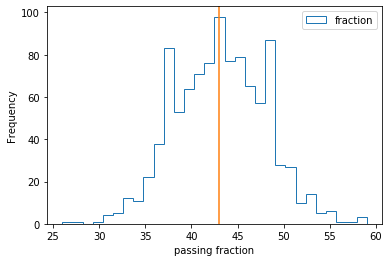

In [69]:
bootstrap.plot(kind='hist',histtype='step',bins=30)
pp.xlabel('passing fraction')
pp.axvline(fraction,color='C1')

In [70]:
print(bootstrap.quantile(0.025))
print(bootstrap.quantile(0.975))

fraction    34.0
Name: 0.025, dtype: float64
fraction    53.0
Name: 0.975, dtype: float64
